# Import lib

In [12]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
from tensorflow.keras.utils import plot_model

# Create model

In [33]:
class CNN:
  def __init__(self):
    self.model = None

  def build(self, input_size):
    input = Input(shape=input_size, name='input')
    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)
    P1 = MaxPooling2D(strides=2)(C1)
    C2 = Conv2D(8, (3, 3), padding='same', activation='relu')(P1)
    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(C2)
    Add1 = Add()([C3, P1])
    C4 = Conv2D(16, (3, 3), padding='same', activation='relu', strides=2)(Add1)
    C5 = Conv2D(16, (3, 3), padding='same', activation='relu')(C4)
    C6 = Conv2D(16, (3, 3), padding='same', activation='relu')(C5)
    Add2 = Add()([C4, C6])
    P2 = AveragePooling2D()(Add2)
    flat = Flatten()(P2)
    FC1 = Dense(400, activation='relu')(flat)
    FC2 = Dense(10, activation='softmax', name='output')(FC1)
    output = FC2

    self.model = Model(input, output)
    self.model.compile(optimizer='adam', loss='categorical_crossentropy')

  def train(self, X_train, y_train, X_test, y_test):
    return self.model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)

  def summary(self):
    plot_model(self.model, to_file='model.png')
    self.model.summary()

  def predict(self, X_test):
    return self.model.predict(X_test)

# Get dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Onehot

In [4]:
def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])] = 1
  return oh

# Data Preprocess

In [5]:
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

# Call model

In [25]:
model = CNN()
model.build((28, 28, 1))
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 28, 28, 8)    80          input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 14, 14, 8)    0           conv2d_30[0][0]                  
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 14, 14, 8)    584         max_pooling2d_5[0][0]            
____________________________________________________________________________________________

# Train model

In [26]:
train = model.train(X_train_norm, y_train_oh, X_test_norm, y_test_oh)

Epoch 1/50
938/938 [==============================] - 8s 8ms/step - loss: 0.2786 - val_loss: 0.1094
Epoch 2/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0862 - val_loss: 0.0511
Epoch 3/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0617 - val_loss: 0.0484
Epoch 4/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0500 - val_loss: 0.0536
Epoch 5/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0419 - val_loss: 0.0369
Epoch 6/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0356 - val_loss: 0.0407
Epoch 7/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0316 - val_loss: 0.0395
Epoch 8/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0275 - val_loss: 0.0388
Epoch 9/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0245 - val_loss: 0.0313
Epoch 10/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0220 - val_loss: 0.0359

# Plot loss

In [18]:
import matplotlib.pyplot as plt

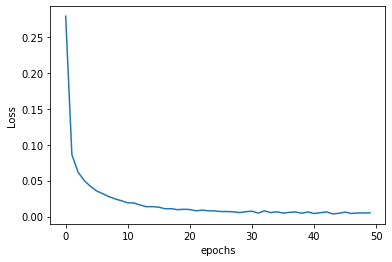

In [27]:
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.plot(train.history['loss'])
plt.show()

# Evaluate

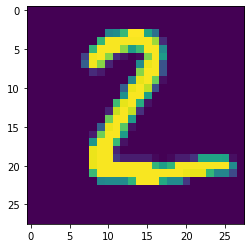

Predicted:  2
Ground truth:  2


In [42]:
pred = model.predict(X_test)
test_idx = 1
plt.imshow(X_test_norm[test_idx])
plt.show()
print("Predicted: ", np.argmax(pred[test_idx]))
print("Ground truth: ", y_test[test_idx])

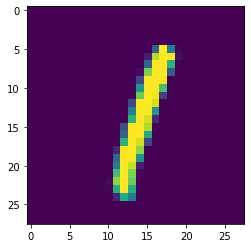

Predicted:  1
Ground truth:  1


In [43]:
pred = model.predict(X_test)
test_idx = 5
plt.imshow(X_test_norm[test_idx])
plt.show()
print("Predicted: ", np.argmax(pred[test_idx]))
print("Ground truth: ", y_test[test_idx])

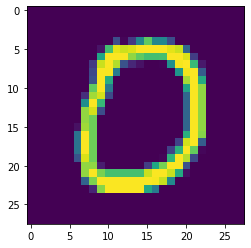

Predicted:  0
Ground truth:  0


In [45]:
pred = model.predict(X_test)
test_idx = 10
plt.imshow(X_test_norm[test_idx])
plt.show()
print("Predicted: ", np.argmax(pred[test_idx]))
print("Ground truth: ", y_test[test_idx])